In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [27]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [28]:
for j in range(n):
    qc_output.measure(j,j)

In [29]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

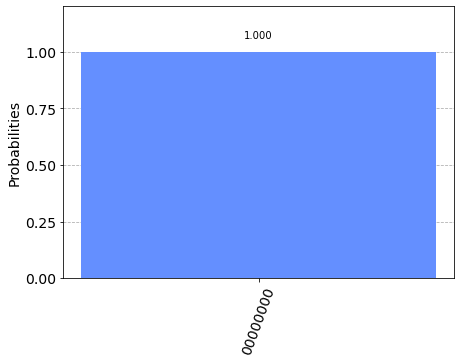

In [30]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [31]:
qc_ha = QuantumCircuit(4,2)

qc_ha.x(0) 
qc_ha.x(1) 
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)

qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0) 
qc_ha.measure(3,1) 

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

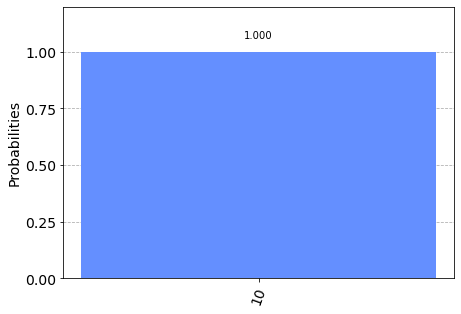

In [32]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

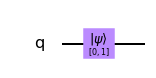

In [33]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

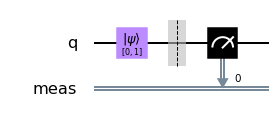

In [34]:
qc.measure_all()
qc.draw(output='mpl')

In [35]:
result = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
print(result)

[0.+0.j 1.+0.j]


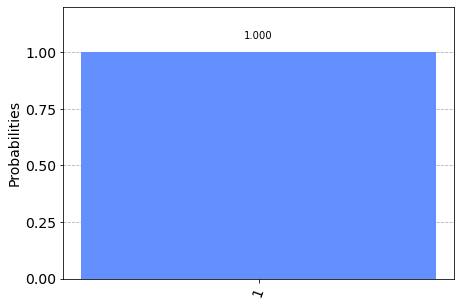

In [36]:
counts = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(counts)

In [37]:
backend = Aer.get_backend('statevector_simulator')
initial_state = [1/sqrt(2),1j/sqrt(2)]
qc.initialize(initial_state,0)
state = execute(qc,backend).result().get_statevector()
print(state)

[0.70710678+0.j         0.        +0.70710678j]


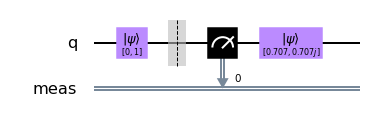

In [38]:
qc.draw(output='mpl')

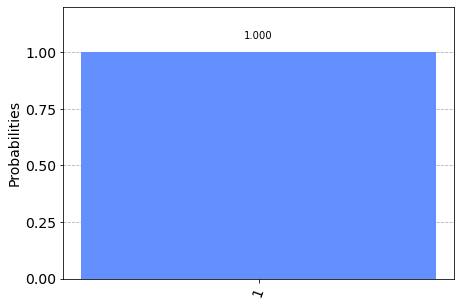

In [39]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [40]:

qc = QuantumCircuit(1)
initial_state = [(0. + 1.j/sqrt(2)),(1./sqrt(2)+0.j)]
qc.initialize(initial_state, 0)
qc.draw('text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [41]:
state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
print(state)

[0.        +0.70710678j 0.70710678+0.j        ]


In [42]:
qc.measure_all()
qc.draw('text')

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [43]:
state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
print(state)

[0.+0.j 1.+0.j]


# Bloch Sphere

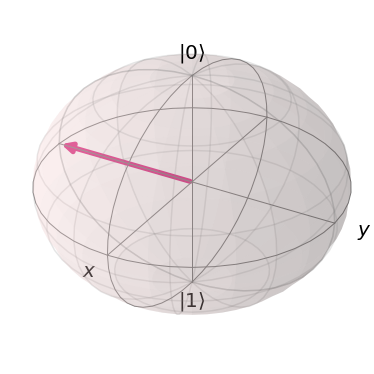

In [9]:
plot_bloch_vector([0,-1,0])